In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import re,os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
dt_base= []
for line in open(r"F:\ML_project\Imdb_Sentiment_Analysis\full_train.txt", 'r',encoding="utf8"):
    
    dt_base.append(line.strip())
    
dt_test_base = []
for line in open(r'F:\ML_project\Imdb_Sentiment_Analysis\full_test.txt', 'r',encoding="utf8"):
    
    dt_test_base.append(line.strip())
    
target = [1 if i < 12500 else 0 for i in range(25000)]


In [32]:
dt_base=pd.DataFrame(dt_base,columns=['Movie Review'])
dt_base['Target']=target
dt_test_base=pd.DataFrame(dt_test_base,columns=['Movie Review'])

dt_base.head(5)

,Movie Review,Target
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


### Data Cleaning and Visualization

**Removal of stop words using customized list of stop words** 

In [33]:
stop_words = ['in', 'of', 'at', 'a', 'the']
custom_stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
                    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
                    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
                    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
                    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
                    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
                    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
                    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
                    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't",
                    'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
                    "couldn't", 'didn', "didn't", 'doesn', "doesn't","it","br" 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
                    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shan', "shan't",
                    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [34]:
stop_words2=[]
stop_words2.extend(custom_stop_words)
stop_words2=list(set(stop_words2))

def remove_stop_words(text):
    removed_stop_words = ""
    text=text.lower()
    text=' '.join([word for word in text.split() if word not in stop_words2])
    return text

dt_base_new=pd.DataFrame(dt_base['Movie Review'].apply(remove_stop_words),columns='Movie Review')
dt_test_base_new=pd.DataFrame(dt_test_base['Movie Review'].apply(remove_stop_words),columns='Movie Review')

In [ ]:
dt_base_new=pd.DataFrame(dt_base['Movie Review'].apply(remove_stop_words),columns='Movie Review')
dt_test_base_new=pd.DataFrame(dt_test_base['Movie Review'].apply(remove_stop_words),columns='Movie Review')

In [35]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def clean_text(text):
    text = REPLACE_NO_SPACE.sub(NO_SPACE, text.lower())
    text = REPLACE_WITH_SPACE.sub(SPACE, text)
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub(r'http\S+', '', text) ## removes urls
    text = re.sub('<.*?>', '',text)## removes html patterns
    return text
    
dt_base['Movie Review']=dt_base['Movie Review'].apply(clean_text)
dt_test_base['Movie Review']=dt_test_base['Movie Review'].apply(clean_text)

In [73]:
dt_base_new.head()

,Movie Review,Target
0,bromwell high is a cartoon comedy it ran at th...,1
1,homelessness or houselessness as george carlin...,1
2,brilliant over acting by lesley ann warren bes...,1
3,this is easily the most underrated film inn th...,1
4,this is not the typical mel brooks film it was...,1


**Cleaned Text Data visualization and exploration**

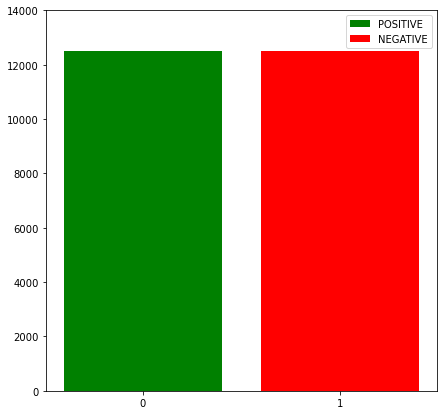

In [54]:
h=list(dt_base["Target"].value_counts())
fig, ax = plt.subplots(figsize=(7,7))
op=ax.bar([0,1],h,color=['g','r'])
ax.legend(op, ['POSITIVE','NEGATIVE'])
plt.xticks([0,1])
plt.ylim(0,14000)
plt.show()

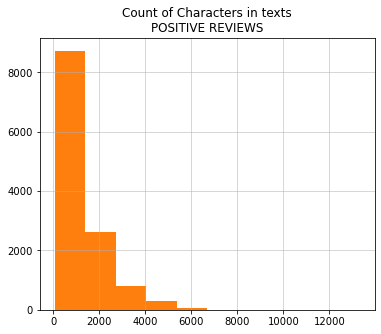

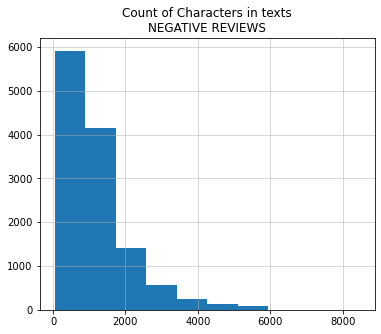

In [55]:
plt.figure(figsize=(6,5))
plt.title('Count of Characters in texts\nPOSITIVE REVIEWS')
text_len=dt_base[dt_base['Target']==1]['Movie Review'].str.len()
plt.hist(text_len,color='C1')
plt.grid(linewidth=0.5)
plt.show()

plt.figure(figsize=(6,5))
text_len=dt_base[dt_base['Target']==0]['Movie Review'].str.len()
plt.title('Count of Characters in texts\nNEGATIVE REVIEWS')
plt.hist(text_len,color='C0')
plt.grid(linewidth=0.5)
plt.show()

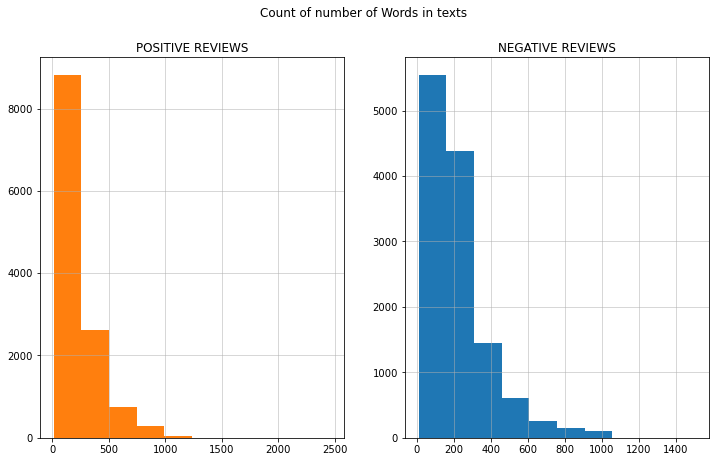

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,7))
text_len=dt_base[dt_base['Target']==1]['Movie Review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='C1')
ax1.set_title('POSITIVE REVIEWS')
ax1.grid(linewidth=0.5)
text_len=dt_base[dt_base['Target']==0]['Movie Review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='C0')
ax2.set_title('NEGATIVE REVIEWS')
fig.suptitle('Count of number of Words in texts')
plt.grid(linewidth=0.5)
plt.show()

In [63]:
def frequent_words_text_ngrams(input_text, n, g):
    vec = CountVectorizer(ngram_range=(g, g) ).fit(input_text)
    vocab_words = vec.transform(input_text)
    words_sum = vocab_words.sum(axis=0) 
    words_freq = [(word, words_sum[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [71]:
dt_base_new[:10]

,Movie Review
0,bromwell high cartoon comedy ran time programs...
1,homelessness houselessness george carlin state...
2,brilliant acting lesley ann warren best dramat...
3,easily underrated film inn brooks cannon sure ...
4,typical mel brooks film much less slapstick mo...
5,isnt comedic robin williams quirky insane robi...
6,yes art successfully make slow paced thriller ...
7,critically acclaimed psychological thriller ba...
8,night listener ** robin williams toni collette...
9,know robin williams god bless constantly shoot...


In [74]:
most_common_uni = frequent_words_text_ngrams(dt_base_new['Movie Review'],18,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

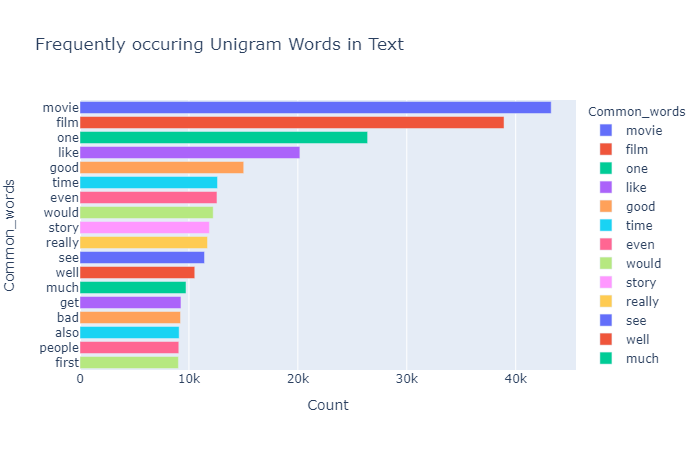

In [76]:
fig2= px.bar(temp, x="Count", y="Common_words", title='Frequently occuring Unigram Words in Text', orientation='h', 
             width=750, height=750,color='Common_words')
fig2.show("png")

In [78]:
most_common_bi = frequent_words_text_ngrams(dt_base_new['Movie Review'],18,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())


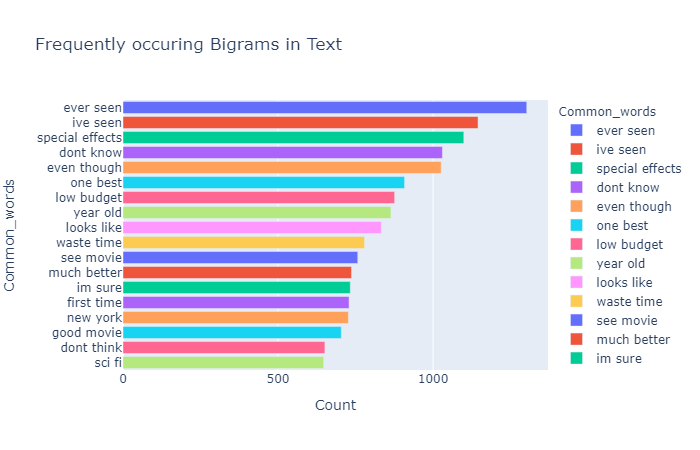

In [80]:
fig1 = px.bar(temp, x="Count", y="Common_words", title='Frequently occuring Bigrams in Text', orientation='h', 
             width=750, height=750,color='Common_words')
fig1.show("png")

In [82]:
most_common_tri = frequent_words_text_ngrams(dt_base_new['Movie Review'],18,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())


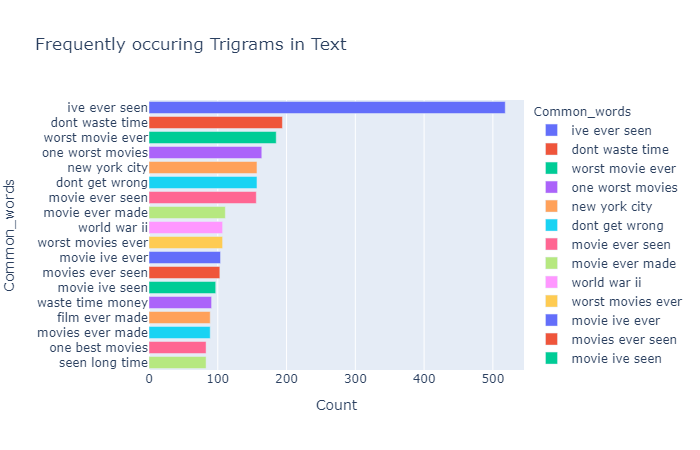

In [84]:
fig = px.bar(temp, x="Count", y="Common_words", title='Frequently occuring Trigrams in Text', orientation='h', 
             width=750, height=750,color='Common_words')
fig.show("png")

### Text Normalization

**Stemming**

In [85]:
def get_stemmed_text(text):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

dt_base['Movie Review']=dt_base['Movie Review'].apply(get_stemmed_text)
dt_test_base['Movie Review']=dt_test_base['Movie Review'].apply(get_stemmed_text)

In [86]:
dt_base.head()

,Movie Review,Target
0,bromwel high is a cartoon comedi it ran at the...,1
1,homeless or houseless as georg carlin state ha...,1
2,brilliant over act by lesley ann warren best d...,1
3,thi is easili the most underr film inn the bro...,1
4,thi is not the typic mel brook film it wa much...,1


**Lemmatization**

In [87]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def get_lemmatized_text(text):
    
    lemmatizer = WordNetLemmatizer()

    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

dt_base['Movie Review']=dt_base['Movie Review'].apply(get_lemmatized_text)
dt_test_base['Movie Review']=dt_test_base['Movie Review'].apply(get_lemmatized_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kraga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
dt_base.head()

,Movie Review,Target
0,bromwel high is a cartoon comedi it ran at the...,1
1,homeless or houseless a georg carlin state ha ...,1
2,brilliant over act by lesley ann warren best d...,1
3,thi is easili the most underr film inn the bro...,1
4,thi is not the typic mel brook film it wa much...,1


**Feature extraction and Representation**

### Using TFIDF for Text vectorization and representation

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_vectorizer.fit(dt_base['Movie Review'])
tfidf_X = tfidf_vectorizer.transform(dt_base['Movie Review'])
tfidf_X_test = tfidf_vectorizer.transform(dt_test_base['Movie Review'])


Splitting the data vectorized using TFIDF into testing and training sets

In [90]:
from sklearn.model_selection import train_test_split

X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split( tfidf_X, dt_base['Target'], 
                                                  train_size = 0.75,random_state=2)

## Evaluation TFIDF data for final model - tfidf_X_test

### Using N gram model (range 1 to 3) for vector encoding of features

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3),stop_words=stop_words)
## Allows trigrams to unigrams 
ngram_vectorizer.fit(dt_base['Movie Review'])
Ngram_X = ngram_vectorizer.transform(dt_base['Movie Review'])
Ngram_X_test = ngram_vectorizer.transform(dt_test_base['Movie Review'])

Splitting the data vectorized using Ngram model into testing and training sets

In [92]:
from sklearn.model_selection import train_test_split

X_train_ngram, X_val_ngram, y_train_ngram, y_val_ngram = train_test_split( Ngram_X , dt_base['Target'], 
                                                  train_size = 0.75,random_state=2)

## Evaluation Ngram data for final model - Ngram_X_test

### Logistic Regression Model Building

> Using TFIDF vectorization

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_tfidf, y_train_tfidf)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val_tfidf, lr.predict(X_val_tfidf))))

Accuracy for C=0.01: 0.80272
Accuracy for C=0.05: 0.83904
Accuracy for C=0.25: 0.87088
Accuracy for C=0.5: 0.87824
Accuracy for C=1: 0.88336


In [104]:
results=pd.DataFrame(columns=['Final Accuracy', 'Recall Score', 'f1 Score', 'Precision Score'])

In [105]:
final_tfidf = LogisticRegression(C=1)
final_tfidf.fit(tfidf_X, target)
print("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(tfidf_X_test)))
print("Recall Score: %s" 
      % recall_score(target, final_tfidf.predict(tfidf_X_test)))
print("f1 Score: %s"
      % f1_score(target, final_tfidf.predict(tfidf_X_test)))
print("Precision Score: %s"
      % precision_score(target, final_tfidf.predict(tfidf_X_test)))
new_row=[accuracy_score(target, final_tfidf.predict(tfidf_X_test)),
                              recall_score(target, final_tfidf.predict(tfidf_X_test)),
                              f1_score(target, final_tfidf.predict(tfidf_X_test)),
                              precision_score(target, final_tfidf.predict(tfidf_X_test))]
results.loc[len(results)]=new_row


Final Accuracy: 0.88208
Recall Score: 0.88152
f1 Score: 0.8820139277995678
Precision Score: 0.8825084094185488


> Using Ngram model based vectorization

In [96]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train_ngram, y_train_ngram)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val_ngram, lr.predict(X_val_ngram))))

Accuracy for C=0.01: 0.88432
Accuracy for C=0.05: 0.88896
Accuracy for C=0.25: 0.89056
Accuracy for C=0.5: 0.89104
Accuracy for C=1: 0.89232


In [106]:
final_ngram = LogisticRegression(C=0.5)
final_ngram.fit(Ngram_X, target)
print("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(Ngram_X_test)))
print("Recall Score: %s" 
      % recall_score(target, final_ngram.predict(Ngram_X_test)))
print("f1 Score: %s"
      % f1_score(target, final_ngram.predict(Ngram_X_test)))
print("Precision Score: %s"
      % precision_score(target, final_ngram.predict(Ngram_X_test)))

new_row=[accuracy_score(target, final_ngram.predict(Ngram_X_test)),
                              recall_score(target, final_ngram.predict(Ngram_X_test)),
                              f1_score(target, final_ngram.predict(Ngram_X_test)),
                              precision_score(target, final_ngram.predict(Ngram_X_test))]
results.loc[len(results)]=new_row

C:\Users\kraga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Final Accuracy: 0.90076
Recall Score: 0.9084
f1 Score: 0.901512444920805
Precision Score: 0.8947285477897723


### SVM Classifier Model Building

> Using TFIDF vectorization

In [103]:
from sklearn.svm import LinearSVC
for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train_tfidf, y_train_tfidf)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val_tfidf, svm.predict(X_val_tfidf))))

Accuracy for C=0.001: 0.80016
Accuracy for C=0.005: 0.83552
Accuracy for C=0.01: 0.85248
Accuracy for C=0.05: 0.87984
Accuracy for C=0.1: 0.8832


In [107]:
final_tfidf = LinearSVC(C=0.1)
final_tfidf.fit(tfidf_X, target)
print("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(tfidf_X_test)))
print("Recall Score: %s" 
      % recall_score(target, final_tfidf.predict(tfidf_X_test)))
print("f1 Score: %s"
      % f1_score(target, final_tfidf.predict(tfidf_X_test)))
print("Precision Score: %s"
      % precision_score(target, final_tfidf.predict(tfidf_X_test)))
new_row=[accuracy_score(target, final_tfidf.predict(tfidf_X_test)),
                              recall_score(target, final_tfidf.predict(tfidf_X_test)),
                              f1_score(target, final_tfidf.predict(tfidf_X_test)),
                              precision_score(target, final_tfidf.predict(tfidf_X_test))]
results.loc[len(results)]=new_row

Final Accuracy: 0.88328
Recall Score: 0.8852
f1 Score: 0.8835036729479399
Precision Score: 0.8818138348740835


> Using Ngram model based vectorization

In [108]:
for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train_ngram, y_train_ngram)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val_ngram, svm.predict(X_val_ngram))))

Accuracy for C=0.001: 0.88544
Accuracy for C=0.005: 0.89248
Accuracy for C=0.01: 0.89232
Accuracy for C=0.05: 0.89088
Accuracy for C=0.1: 0.89088


In [109]:
final_ngram = LinearSVC(C=0.01)
final_ngram.fit(Ngram_X, target)
print ("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(Ngram_X_test)))
print("Recall Score: %s" 
      % recall_score(target, final_ngram.predict(Ngram_X_test)))
print("f1 Score: %s"
      % f1_score(target, final_ngram.predict(Ngram_X_test)))
print("Precision Score: %s"
      % precision_score(target, final_ngram.predict(Ngram_X_test)))
new_row=[accuracy_score(target, final_ngram.predict(Ngram_X_test)),
                              recall_score(target, final_ngram.predict(Ngram_X_test)),
                              f1_score(target, final_ngram.predict(Ngram_X_test)),
                              precision_score(target, final_ngram.predict(Ngram_X_test))]
results.loc[len(results)]=new_row

Final Accuracy: 0.90112
Recall Score: 0.90864
f1 Score: 0.9018580276322058
Precision Score: 0.8951765447667087


### Navie Bayes Classifier Model Building

>Using TFIDF vectorization

In [110]:
from sklearn.naive_bayes import MultinomialNB

for c in [ 0.01, 0.05, 0.1, 0.5, 1]:
    
    clf = MultinomialNB(alpha=c)
    clf.fit(X_train_tfidf, y_train_tfidf)
    print ("Accuracy for alpha=%s: %s" 
           % (c, accuracy_score(y_val_tfidf, clf.predict(X_val_tfidf))))

Accuracy for alpha=0.01: 0.84176
Accuracy for alpha=0.05: 0.84848
Accuracy for alpha=0.1: 0.84928
Accuracy for alpha=0.5: 0.85168
Accuracy for alpha=1: 0.848


In [111]:
final_tfidf = MultinomialNB(alpha=0.5)
final_tfidf.fit(tfidf_X, target)
print("Final Accuracy: %s" 
       % accuracy_score(target, final_tfidf.predict(tfidf_X_test)))
print("Recall Score: %s" 
      % recall_score(target, final_tfidf.predict(tfidf_X_test)))
print("f1 Score: %s"
      % f1_score(target, final_tfidf.predict(tfidf_X_test)))
print("Precision Score: %s"
      % precision_score(target, final_tfidf.predict(tfidf_X_test)))

new_row=[accuracy_score(target, final_tfidf.predict(tfidf_X_test)),
                              recall_score(target, final_tfidf.predict(tfidf_X_test)),
                              f1_score(target, final_tfidf.predict(tfidf_X_test)),
                              precision_score(target, final_tfidf.predict(tfidf_X_test))]
results.loc[len(results)]=new_row

Final Accuracy: 0.81676
Recall Score: 0.75808
f1 Score: 0.805337186079123
Precision Score: 0.8588779117193873


>Using Ngram model based vectorization

In [112]:
for c in [ 0.01, 0.05, 0.1, 0.5, 1]:
    
    clf = MultinomialNB(alpha=c)
    clf.fit(X_train_ngram, y_train_ngram)
    print("Accuracy for alpha=%s: %s" 
           % (c, accuracy_score(y_val_ngram, clf.predict(X_val_ngram))))

Accuracy for alpha=0.01: 0.8808
Accuracy for alpha=0.05: 0.8848
Accuracy for alpha=0.1: 0.88336
Accuracy for alpha=0.5: 0.88144
Accuracy for alpha=1: 0.88016


In [113]:
final_ngram = MultinomialNB(alpha=0.05)
final_ngram.fit(Ngram_X, target)
print("Final Accuracy: %s" 
       % accuracy_score(target, final_ngram.predict(Ngram_X_test)))
print("Recall Score: %s" 
      % recall_score(target, final_ngram.predict(Ngram_X_test)))
print("f1 Score: %s"
      % f1_score(target, final_ngram.predict(Ngram_X_test)))
print("Precision Score: %s"
      % precision_score(target, final_ngram.predict(Ngram_X_test)))
new_row=[accuracy_score(target, final_ngram.predict(Ngram_X_test)),
                              recall_score(target, final_ngram.predict(Ngram_X_test)),
                              f1_score(target, final_ngram.predict(Ngram_X_test)),
                              precision_score(target, final_ngram.predict(Ngram_X_test))]
results.loc[len(results)]=new_row

Final Accuracy: 0.8702
Recall Score: 0.8316
f1 Score: 0.8649885583524027
Precision Score: 0.9011703511053316


### Comparative Study of the various classifiers used along with various evaluation metrics

In [114]:
results.index=['Logistic Regression (Tfidf)','Logistic Regression (Ngram)','SVM (Tfidf)','SVM (Ngram)','Multinomial Naive Bayes (Tfidf)','Multinomial Naive Bayes (Ngram)'] 
results

,Final Accuracy,Recall Score,f1 Score,Precision Score
Logistic Regression (Tfidf),0.88208,0.88152,0.882014,0.882508
Logistic Regression (Ngram),0.90076,0.90840,0.901512,0.894729
SVM (Tfidf),0.88328,0.88520,0.883504,0.881814
SVM (Ngram),0.90112,0.90864,0.901858,0.895177
Multinomial Naive Bayes (Tfidf),0.81676,0.75808,0.805337,0.858878
Multinomial Naive Bayes (Ngram),0.87020,0.83160,0.864989,0.901170


In [115]:
results.style\
.bar()

,Final Accuracy,Recall Score,f1 Score,Precision Score
Logistic Regression (Tfidf),0.882080,0.881520,0.882014,0.882508
Logistic Regression (Ngram),0.900760,0.908400,0.901512,0.894729
SVM (Tfidf),0.883280,0.885200,0.883504,0.881814
SVM (Ngram),0.901120,0.908640,0.901858,0.895177
Multinomial Naive Bayes (Tfidf),0.816760,0.758080,0.805337,0.858878
Multinomial Naive Bayes (Ngram),0.870200,0.831600,0.864989,0.901170


In [116]:
pd.set_option('display.max_colwidth', 40)

results.style \
  .format('{:.4f}') \
  .background_gradient(cmap='Blues') \
  .set_caption('Evaluation Scores with Bar Chart') \
  .set_properties(padding="12px", border='2px solid white', width='160px')

,Final Accuracy,Recall Score,f1 Score,Precision Score
Logistic Regression (Tfidf),0.8821,0.8815,0.8820,0.8825
Logistic Regression (Ngram),0.9008,0.9084,0.9015,0.8947
SVM (Tfidf),0.8833,0.8852,0.8835,0.8818
SVM (Ngram),0.9011,0.9086,0.9019,0.8952
Multinomial Naive Bayes (Tfidf),0.8168,0.7581,0.8053,0.8589
Multinomial Naive Bayes (Ngram),0.8702,0.8316,0.8650,0.9012


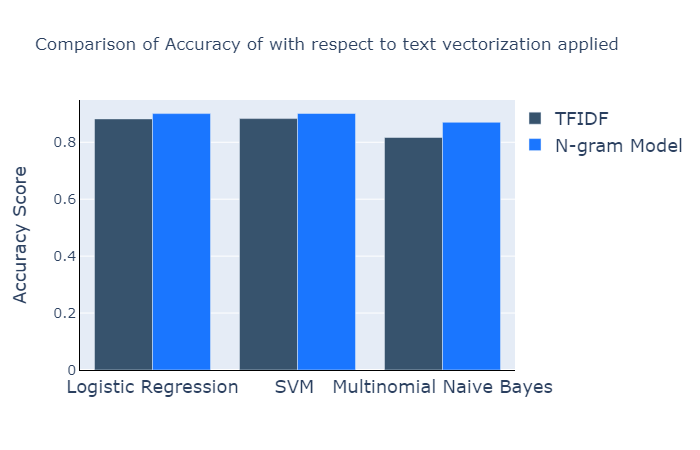

In [117]:
vector_comp=results.copy()
vector_comp.index=['Logistic Regression','Logistic Regression','SVM ','SVM ','Multinomial Naive Bayes','Multinomial Naive Bayes'] 

fig = go.Figure()
fig.add_trace(go.Bar( x=vector_comp.index[::2], y=vector_comp['Final Accuracy'][::2],
                     marker_color='rgb(55, 83, 109)', name='TFIDF'
                ))
fig.add_trace(go.Bar( x=vector_comp.index[1::2], y=vector_comp['Final Accuracy'][1::2],
                marker_color='rgb(26, 118, 255)', name='N-gram Model'
                ))
fig.update_layout(
    title='Comparison of Accuracy of with respect\nto text vectorization applied',
    xaxis_tickfont_size=18,
    yaxis=dict(
        title='Accuracy Score',
        titlefont_size=18,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
    ),
    legend_font_size=18)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show("png")

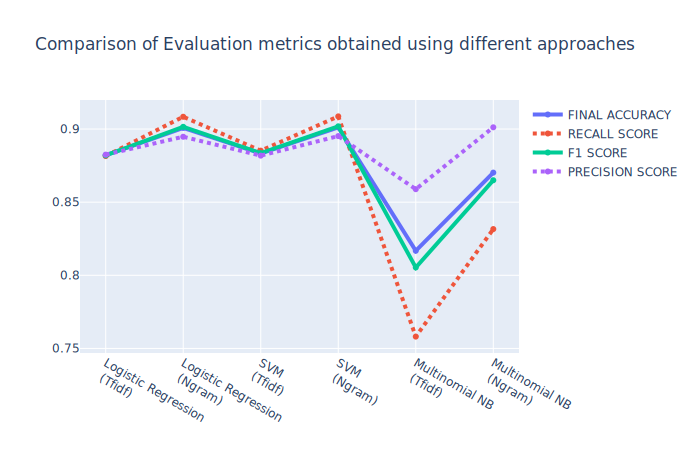

In [131]:
xlabs=['Logistic Regression<br> (Tfidf)','Logistic Regression<br> (Ngram)',
       'SVM <br>(Tfidf)','SVM<br> (Ngram)','Multinomial NB<br> (Tfidf)','Multinomial NB<br> (Ngram)']

fig = go.Figure()
for i, col in enumerate(results.columns, start=1):
    if i%2==1:
        fig.add_trace(go.Scatter(x=xlabs, y=results[col],
                  mode='lines+markers',name=col.upper(),
                  line = dict( width=4)))
    else:
        fig.add_trace(go.Scatter(x=xlabs, y=results[col],
                  mode='lines+markers',name=col.upper(),
                  line = dict( width=4,dash='dot')))

fig.update_traces(mode='markers+lines')
fig.update_layout(title='Comparison of Evaluation metrics obtained using different approaches',
                 autosize=False,width=900,height=900)
fig.show("svg")

In [ ]:
##,gridcolor='LightGrey'